In [2]:
import os
import sys
import numpy as np
import seaborn as sns
from tqdm import tqdm
import scipy.io as sio
import matplotlib.pyplot as plt
from getoptJ import getnoptJ, getoptJ, getJ
from scipy.interpolate import griddata

In [ ]:
sns.set(style="whitegrid", font_scale=0.8)

filename1 = f'results/baseline_{1}.npy'
filename2 = f'statistics/baseline_{2}.npy'
filename3 = f'statistics/baseline_{3}.npy'
filename4 = f'statistics/baseline_{4}.npy'

data1 = np.load(filename1, allow_pickle=True).item()
data2 = np.load(filename2, allow_pickle=True).item()
data3 = np.load(filename3, allow_pickle=True).item()
data4 = np.load(filename4, allow_pickle=True).item()
samples1 = data1['Wss_ir'].T[::downsample, :]
samples2 = data2['Wss_ir'].T[::downsample, :]
samples3 = data3['Wss_ir'].T[::downsample, :]
samples4 = data4['Wss_ir'].T[::downsample, :]
samples = np.concatenate([samples1, samples2, samples3, samples4], axis=0)
N, dim2 = samples.shape
dim = int(np.sqrt(dim2))  # infer dimension if not 3

In [ ]:
fig, axes = plt.subplots(dim2, dim2, figsize=(dim2, dim2), constrained_layout=True)
# Define custom axis order: column-major for 3x3
custom_order = np.arange(dim2).reshape(dim, dim).T.flatten()
samples = samples[:, custom_order]

for i in range(dim2):
    for j in range(dim2):
        ax = axes[i, j]

        if i == j:
            ax.hist(samples[:, i], bins=30, density=True, alpha=0.8)
        else:
            ax.scatter(samples[:, j], samples[:, i], alpha=0.05, s=2)

        if i == dim2 - 1:
            ax.set_xlabel(f"$W_{{{j+1}}}$")
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(f"$W_{{{i+1}}}$")
        else:
            ax.set_yticks([])

plt.suptitle(f"{dim2}x{dim2} Pairwise Density Projection", fontsize=16, y=1.02)

plt.show()


In [6]:
def visualize_data(X_raw):
    # Plot each row of the original data
    plt.figure(figsize=(10, 6))
    for i in range(X_raw.shape[0]):
        plt.plot(X_raw[i,:], label=f'Component {i+1}')
        plt.title('ICA Data Components')
        plt.xlabel('Sample Index') 
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
    plt.show()
    # plt.savefig('ica_data.png')

X.shape (3, 400)


X.shape (3, 400)


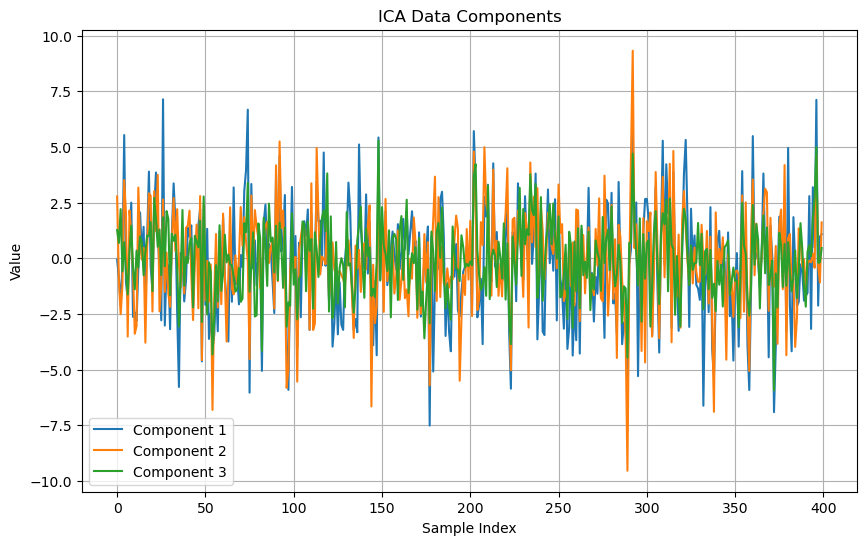

<Figure size 640x480 with 0 Axes>

In [7]:
# Load data
ica_data = sio.loadmat('ica_data3.mat')
X_raw = ica_data['X']
X = X_raw  # Adjust this according to your data structure
print('X.shape', X.shape)

visualize_data(X_raw)

In [5]:
FIM = np.load('E_FIM.npy')

In [16]:
J_nopt = np.load('J_nopt.npy')
norm = 0
for ii in range(1):
    J_nopt = getnoptJ(FIM)
    norm += np.linalg.norm(J_nopt, ord='fro')
norm /= 1
print(norm)

value 16245.911609594581
1812.747244415113


In [7]:
norm = 0
for ii in range(100):
    J_opt = getoptJ(FIM)
    norm += np.linalg.norm(J_opt, ord='fro')
norm /= 100
print(norm)

4.777684407394734


In [6]:
J = getJ(FIM)
np.linalg.norm(J, ord='fro')

0.9999999999999999

In [24]:
J_opt = getoptJ(FIM)
np.linalg.norm(J_opt, ord='fro')

4.62457384775941

In [10]:
J_nopt = np.load('J_nopt.npy')
np.linalg.norm(J_nopt, ord='fro')

9.546781689442932

In [4]:
J_nopt = getnoptJ(FIM)
np.linalg.norm(J_nopt, ord='fro') 

J_opt [[ 5.23452809e-16 -1.13603823e+00  3.50033389e-02  1.48812796e-01
  -9.32959977e-02 -6.99501846e-01 -5.23660469e-01  4.91278026e-01
  -7.64420956e-02]
 [ 1.13603823e+00  6.97358837e-16 -7.62788071e-01  2.58890419e-01
  -1.15116797e-01  3.36886175e-01  2.45325803e-01  6.32035111e-01
   2.98062123e-01]
 [-3.50033389e-02  7.62788071e-01  9.95731275e-16 -5.86412142e-02
   4.80182297e-01  2.19690299e-02 -4.96066032e-01 -2.50902485e-01
  -6.55118049e-01]
 [-1.48812796e-01 -2.58890419e-01  5.86412142e-02  1.66533454e-16
   8.74416720e-01 -3.21778897e-01 -4.73525020e-01 -4.43481042e-01
   1.87492774e+00]
 [ 9.32959977e-02  1.15116797e-01 -4.80182297e-01 -8.74416720e-01
  -3.97034836e-16  2.07805064e-02  7.82044630e-01 -2.72491031e-01
  -6.18107915e-01]
 [ 6.99501846e-01 -3.36886175e-01 -2.19690299e-02  3.21778897e-01
  -2.07805064e-02  5.46871576e-16 -5.41364777e-01  3.28472603e-01
  -6.10947630e-01]
 [ 5.23660469e-01 -2.45325803e-01  4.96066032e-01  4.73525020e-01
  -7.82044630e-01  5.4

45.80588674683357

In [18]:
J_nopt

array([[-4.19803081e-16, -3.30863434e+00,  2.02425279e+00,
        -5.20548942e+00,  6.25635609e+00,  3.68404809e+00,
        -1.65092019e+00, -1.69418133e-03, -1.19448957e+00],
       [ 3.30863434e+00,  2.09554596e-15, -7.14693286e+00,
        -3.27081362e+00,  2.92714530e+00,  1.59507845e+00,
         8.62851011e+00,  1.00642931e+00, -1.01573212e+01],
       [-2.02425279e+00,  7.14693286e+00,  1.23512311e-14,
         1.02336785e+01, -1.80775624e+01, -4.64694103e+00,
        -3.91371222e+00, -6.14766478e+00,  1.44640448e+01],
       [ 5.20548942e+00,  3.27081362e+00, -1.02336785e+01,
        -2.10942375e-15, -2.94302296e-01, -5.95469591e-01,
        -2.79755261e-01,  3.58291909e+00,  3.43882465e+00],
       [-6.25635609e+00, -2.92714530e+00,  1.80775624e+01,
         2.94302296e-01,  1.28022593e-15,  6.92957602e+00,
        -5.45829844e+00, -2.56440889e+00,  1.72604714e+00],
       [-3.68404809e+00, -1.59507845e+00,  4.64694103e+00,
         5.95469591e-01, -6.92957602e+00,  1.346145